In [1]:
from data_parser import stockDataReader
from datetime import datetime, date
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

stock_reader = stockDataReader(1320)
start = datetime(2019, 1, 1)
end = datetime(2020, 1, 1)
stock_reader.get_data()
# or get data from database
# df = stock_reader.read_DB_with_update()
print(df.head(10))

         date   open   high    low  close  volume  adjclose
0  2020-01-31  23820  24090  23820  23870   32390     23870
1  2020-01-30  23950  23980  23550  23640   75573     23640
2  2020-01-29  23990  24060  23880  24040   26149     24040
3  2020-01-28  23820  23910  23780  23890   51185     23890
4  2020-01-27  24010  24150  23980  24010   72712     24010
5  2020-01-24  24560  24560  24440  24510   52694     24510
6  2020-01-23  24530  24600  24470  24490   14261     24490
7  2020-01-22  24520  24720  24520  24710   47309     24710
8  2020-01-21  24770  24770  24530  24540   24633     24540
9  2020-01-20  24760  24800  24760  24770    6575     24770


In [2]:
df = stock_reader.get_df()
df = df.set_index('date')
df.sort_index(inplace=True)
df['100ma'] = df['adjclose'].rolling(window=100, min_periods=0).mean()
print(df.tail(10))

             open   high    low  close  volume  adjclose    100ma
date                                                             
2020-01-22  24520  24720  24520  24710   47309     24710  23268.5
2020-01-23  24530  24600  24470  24490   14261     24490  23302.9
2020-01-24  24560  24560  24440  24510   52694     24510  23336.7
2020-01-27  24010  24150  23980  24010   72712     24010  23370.2
2020-01-28  23820  23910  23780  23890   51185     23890  23400.7
2020-01-29  23990  24060  23880  24040   26149     24040  23432.3
2020-01-30  23950  23980  23550  23640   75573     23640  23460.0
2020-01-31  23820  24090  23820  23870   32390     23870  23487.3
2020-02-03  23450  23690  23410  23640   87421     23640  23513.4
2020-02-04  23540  23770  23500  23730   28957     23730  23540.4


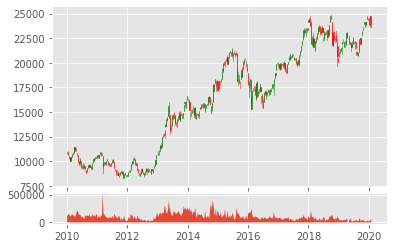

In [4]:
import pandas as pd
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# Need to change the index type to datetime object
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df_ohlc = df['adjclose'].resample('10D').ohlc()
df_volume = df['volume'].resample('10D').mean()

# Convert the date type
df_ohlc.reset_index(inplace=True)
df_ohlc['date'] = df_ohlc['date'].map(mdates.date2num)

# Plot the data
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()